<h1>CG2020 - Tarefa 2</h1>

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pim
from scipy import fftpack
%matplotlib notebook

path = ''
my_name = 'FelipeHolanda_HeloisaPessoa'

<IPython.core.display.Javascript object>


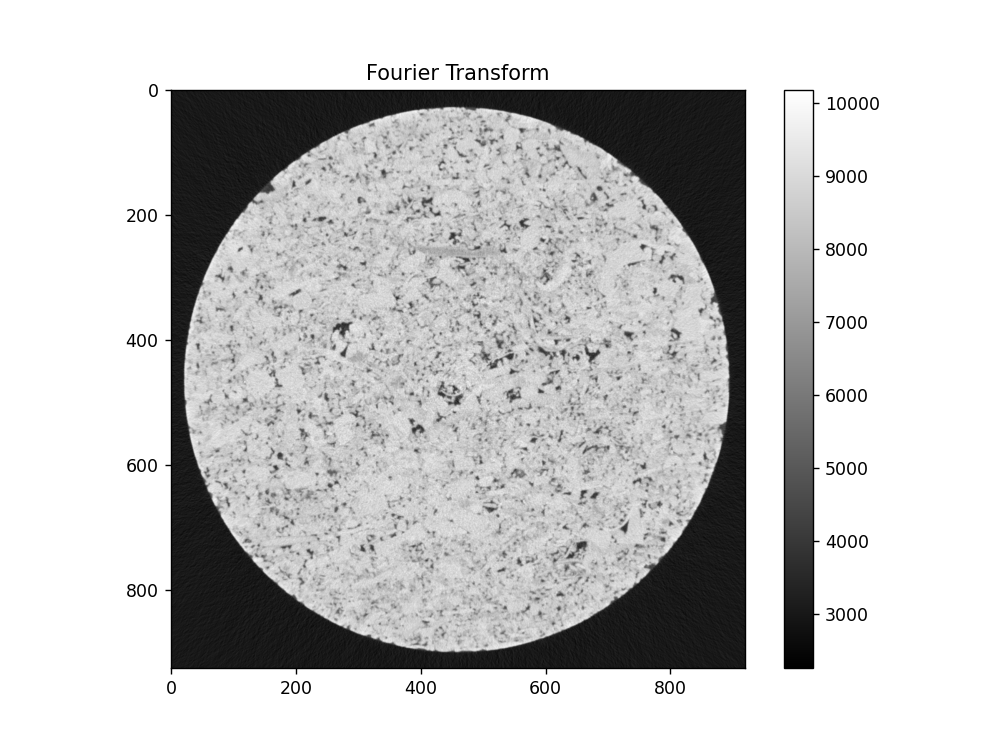

In [119]:
img = pim.imread(path + 'antes0900.tiff')

def show_img(title, _img):
    plt.figure(figsize=(8,6))
    plt.title(title)
    if _img.ndim == 2:
        plt.imshow(_img, cmap = 'gray')
    else:
        plt.imshow(_img)
    plt.show()
    plt.colorbar()
    
show_img('antes0900.tiff', img)

In [120]:
from matplotlib.colors import LogNorm

def plot_spectrum(im_fft, title):
    plt.title(title)
    plt.figure(figsize=(8,4))
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    

<IPython.core.display.Javascript object>


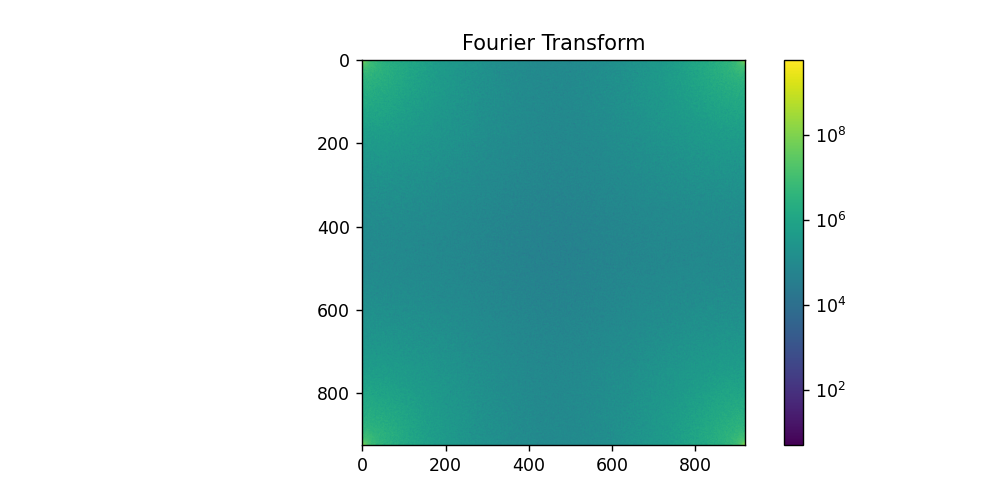

In [121]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

plot_spectrum(im_fft, 'Fourier Transform')

In [122]:
im_fft_shift = fftpack.fftshift(im_fft)

<IPython.core.display.Javascript object>


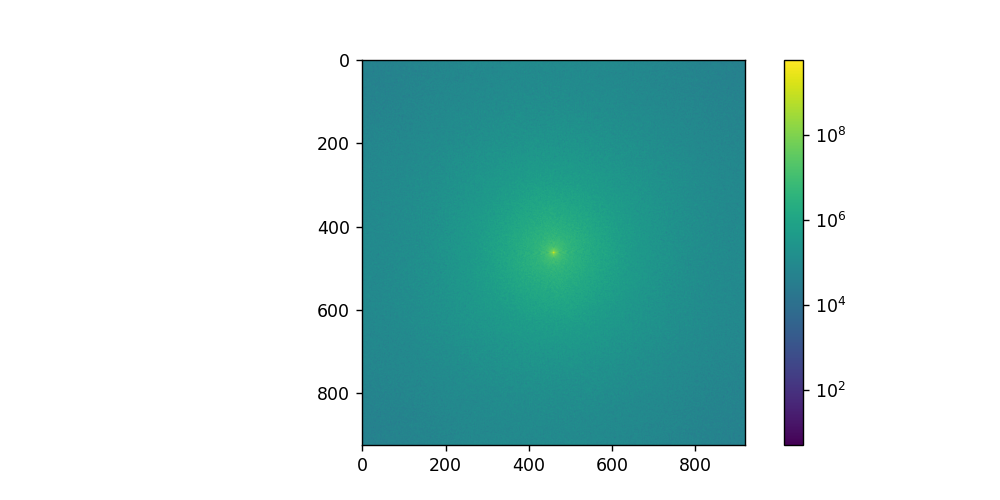

In [123]:
def show_spectrum(im_fft, title):
    plt.title(title)
    plt.figure(figsize=(8,4))
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
show_spectrum(im_fft_shift, 'Fourier Transform')

<IPython.core.display.Javascript object>


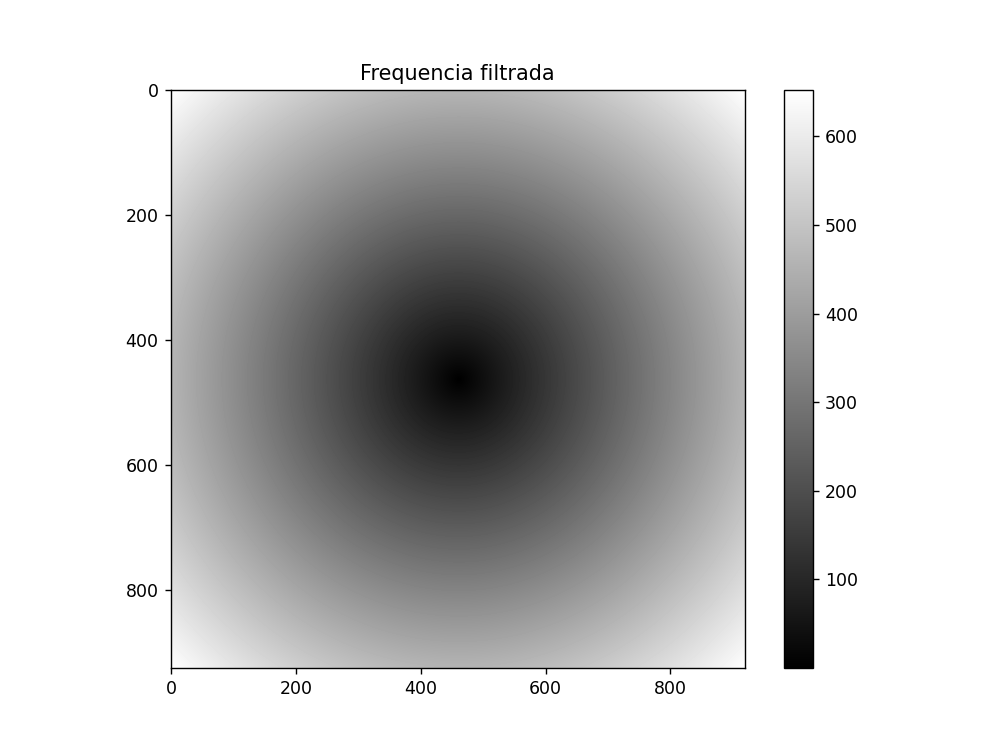

In [124]:
h, w = img.shape[:2]
Y, X = np.ogrid[0 : h, 0 : w]
mask = np.sqrt((X - w / 2) ** 2 + (Y - h / 2)**2)

show_img('SSSZ', mask)

<IPython.core.display.Javascript object>


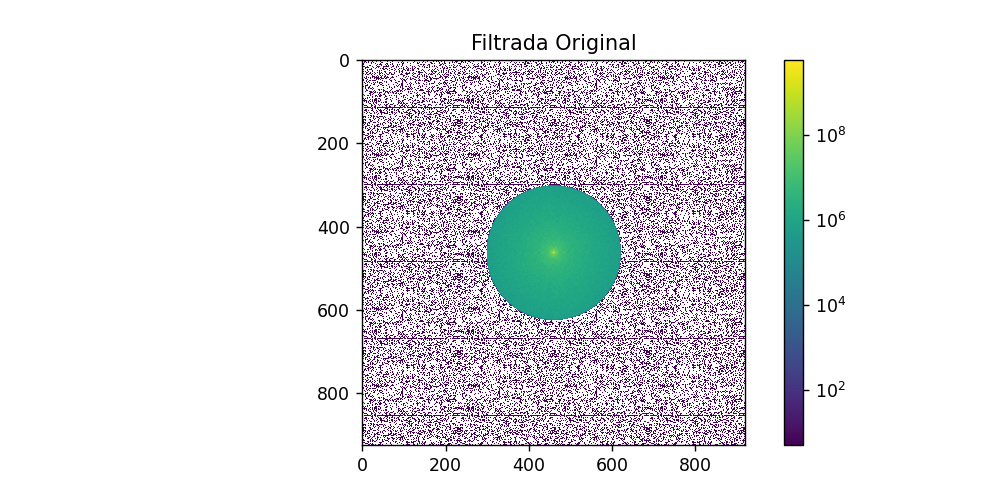

In [125]:
im_fft_shift = fftpack.fftshift(im_fft)
im_fft_shift[mask > 160] = 0
show_spectrum(im_fft_shift, 'Frequencia filtrada')

<IPython.core.display.Javascript object>


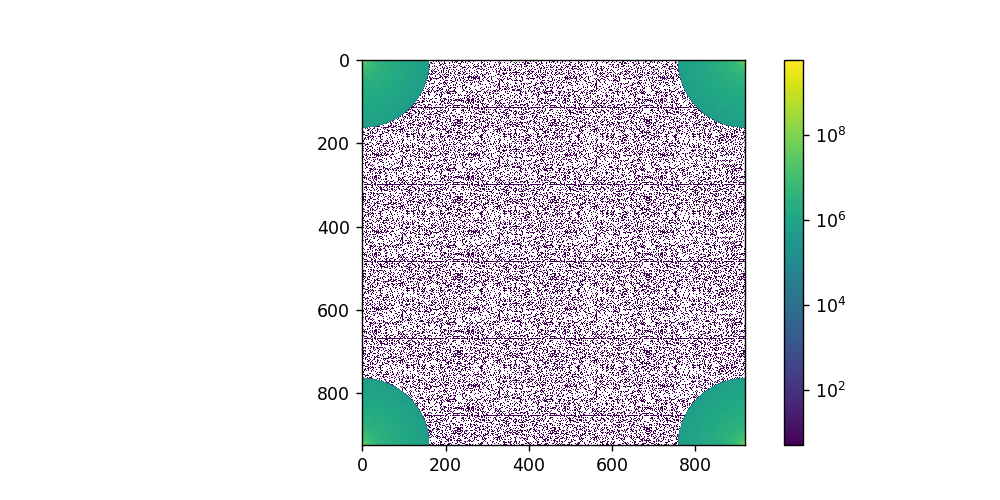

In [126]:
im_fft_2 = fftpack.ifftshift(im_fft_shift)

show_spectrum(im_fft_2, 'Filtrada Original')

<IPython.core.display.Javascript object>


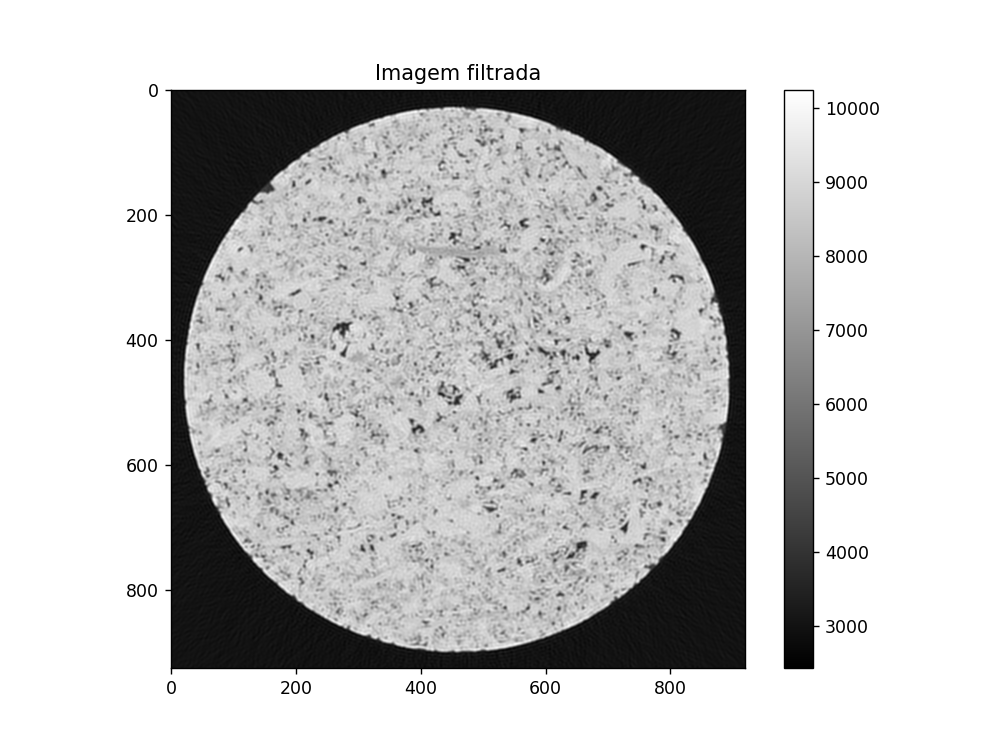

In [127]:
im_2 = fftpack.ifft2(im_fft_2).real
show_img('Imagem filtrada', im_2)

<IPython.core.display.Javascript object>


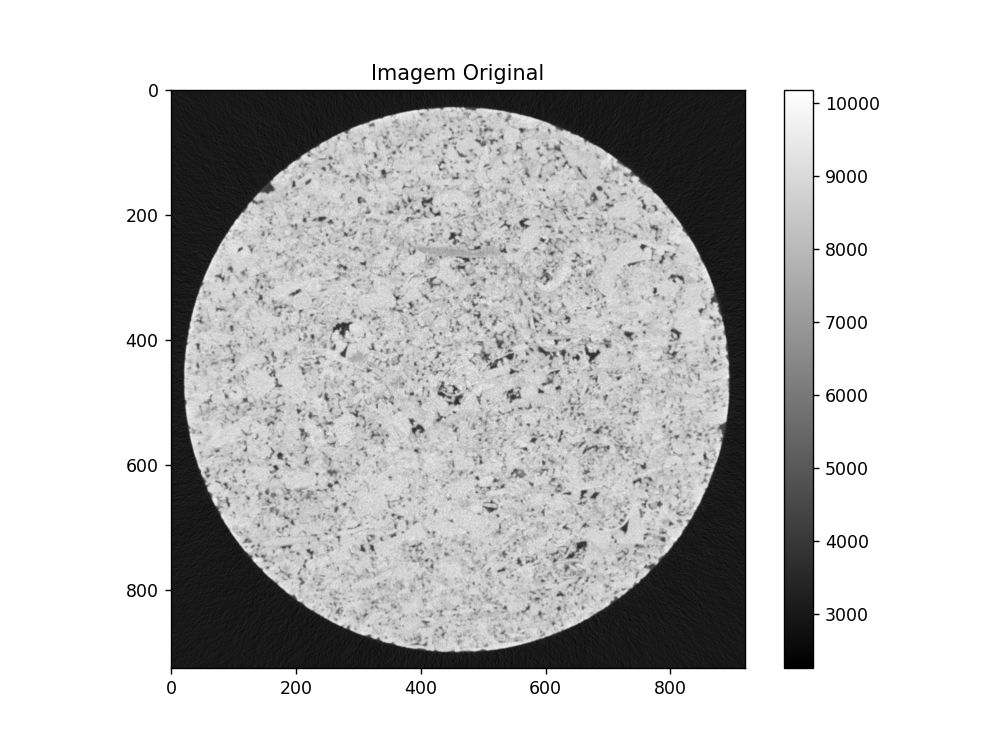

In [128]:
show_img("Imagem Original", img)

In [129]:
from skimage import io
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
%matplotlib notebook

In [130]:
img2 = io.imread(path + 'antes0900.tiff')
h, w = img.shape[:2]

def show_hist(img):
    plt.figure(figsize=(6,4))
    _ = plt.hist(img.ravel(), 255)
    plt.show()

<IPython.core.display.Javascript object>


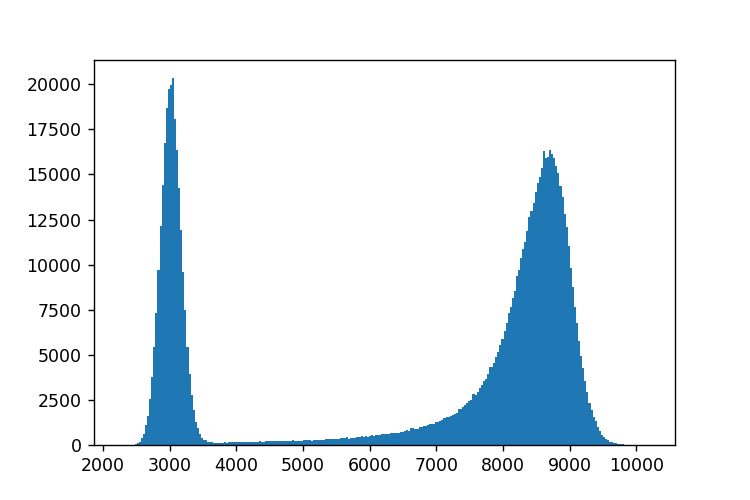

In [131]:
show_hist(img2)

In [132]:
def show_snake(_img, _snake):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(_img, cmap = 'gray')
    ax.plot(_snake[:, 0], _snake[:,1], 'r', lw = 2)
    plt.show()
    

In [133]:
w, h = img.shape[:2]
ang = np.linspace(0, 2 * np.pi, 800)
xc = w / 2
yc = h / 2
r = 0.5 * min(w, h) - 2
x = xc + r * np.cos(ang)
y = yc + r * np.sin(ang)
snake0 = np.array([x, y]).T

<IPython.core.display.Javascript object>


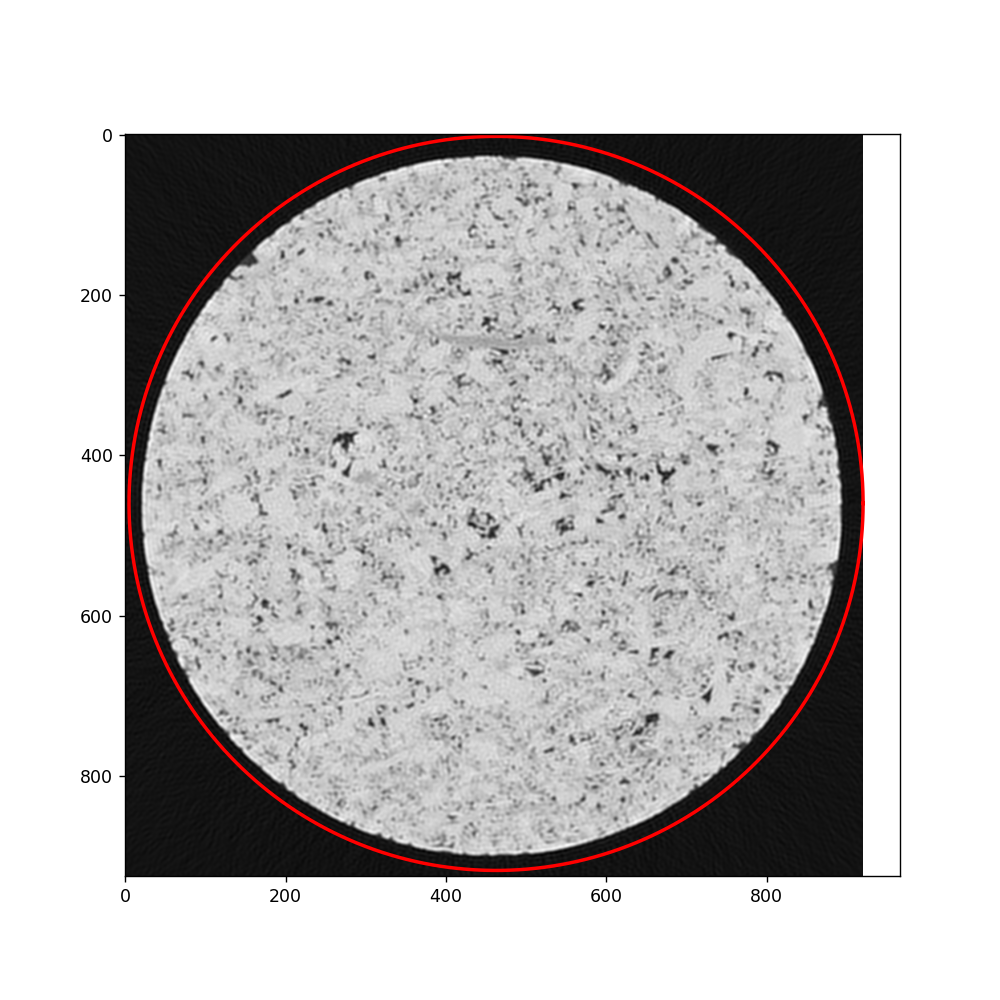

In [134]:
show_snake(im_2, snake0)

<ipython-input-135-fb9d5394d470>:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img, 3), snake0, alpha = 0.015, beta = 10, gamma = 0.001)


<IPython.core.display.Javascript object>


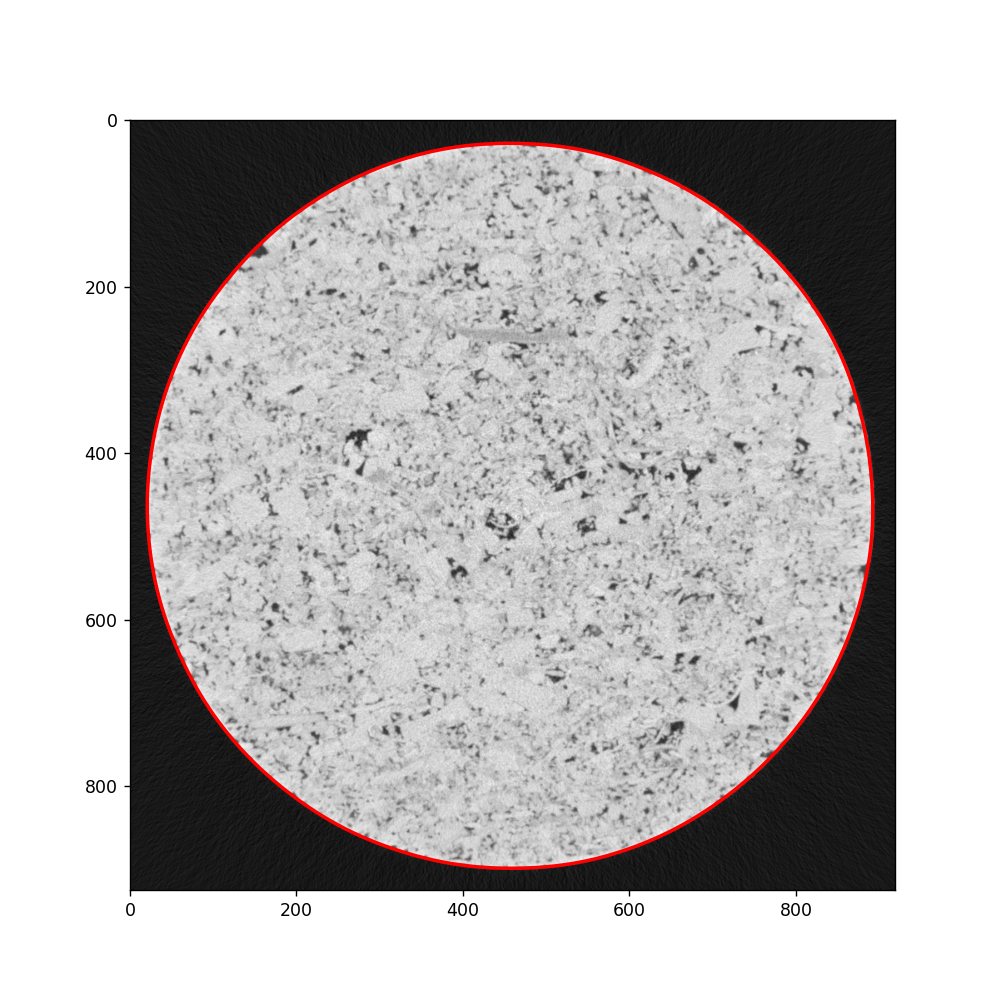

In [135]:
snake = active_contour(gaussian(img, 3), snake0, alpha = 0.015, beta = 10, gamma = 0.001)
show_snake(img, snake)

In [115]:
im_2 = im_2.astype('float32')
im2 = np.array(im_2)
im2max = im2.max()
im2 = im2/im2max
h,w = im2.shape()
# im2max
# plot_spectrum(im_2, 'test')
# show_img('test', im_2)

In [138]:
for i in range(h):
    for j in range(w):
        result = im2
        if im2[i]

(925, 920)